<a href="https://colab.research.google.com/github/2303A51430/ADM-2025-2-2/blob/main/LAB_4(17_02_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [29]:
np.random.seed(42)
data = np.random.normal(50, 15, 100)
outliers = [10, 100, 5, 120]
data = np.append(data, outliers)
df = pd.DataFrame(data, columns=['Value'])

In [30]:
print("\nOriginal Data:")
print(df.head())


Original Data:
       Value
0  57.450712
1  47.926035
2  59.715328
3  72.845448
4  46.487699


In [31]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

In [32]:
outliers_iqr = detect_outliers_iqr(df['Value'])
print("Outliers detected using IQR:", outliers_iqr.tolist())

Outliers detected using IQR: [10.703823438653835, 10.0, 100.0, 5.0, 120.0]


In [33]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = stats.zscore(data)
    return data[np.abs(z_scores) > threshold]

In [34]:
outliers_zscore = detect_outliers_zscore(df['Value'])
print("Outliers detected using Z-Score:", outliers_zscore.tolist())

Outliers detected using Z-Score: [100.0, 120.0]


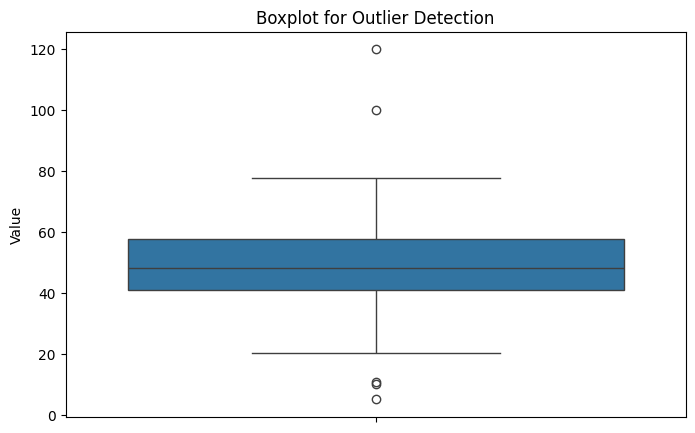

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Value'])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [36]:
def cap_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(data, lower_bound, upper_bound)

In [37]:
df['Capped'] = cap_outliers(df['Value'])

In [38]:
df_removed = df[~df['Value'].isin(outliers_iqr)]

In [39]:
print("\nData after Capping:")
print(df[['Value', 'Capped']].head())


Data after Capping:
       Value     Capped
0  57.450712  57.450712
1  47.926035  47.926035
2  59.715328  59.715328
3  72.845448  72.845448
4  46.487699  46.487699


In [40]:
def impute_outliers(data):
    median = np.median(data)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [median if (x < lower_bound or x > upper_bound) else x for x in data]

In [41]:
df['Imputed'] = impute_outliers(df['Value'])

In [42]:
print("\nData after Imputation:")
print(df[['Value', 'Imputed']].head())


Data after Imputation:
       Value    Imputed
0  57.450712  57.450712
1  47.926035  47.926035
2  59.715328  59.715328
3  72.845448  72.845448
4  46.487699  46.487699
